In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt


In [2]:
# Load the data from the CSV file
data = pd.read_csv("tweets-data.csv")

# Set pandas display options to show all rows
pd.set_option("display.max_rows", None)

# Display a message indicating that the data has been successfully loaded
print("Loaded data:")

# Print the first 5 rows of the DataFrame with a nicer table format
display(data.head(5))


Loaded data:


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.797234e+18,Sun Jun 02 11:48:37 +0000 2024,0,Soal Tapera UKT mahal utang membludak putusan ...,1.797234e+18,NaN,NaN,in,NaN,0,0,0,https://x.com/0b170_uch1h4/status/179723385891...,1.741669e+18,0b170_uch1h4
1,1.797087e+18,Sun Jun 02 11:44:45 +0000 2024,0,@bagusjkk @AndrewsTjan Btw kan td nuduh penduk...,1.797233e+18,NaN,alnesputra10,in,NaN,0,0,0,https://x.com/alnesputra10/status/179723288642...,1.690679e+18,alnesputra10
2,1.797087e+18,Sun Jun 02 11:42:49 +0000 2024,0,@bagusjkk @AndrewsTjan Stick di context awal o...,1.797232e+18,NaN,bagusjkk,in,NaN,0,1,0,https://x.com/alnesputra10/status/179723239995...,1.690679e+18,alnesputra10
3,1.797232e+18,Sun Jun 02 11:42:29 +0000 2024,0,Arisan ibukÂ² sekarang obrolannya politis bang...,1.797232e+18,NaN,NaN,in,NaN,0,0,0,https://x.com/justiswari/status/17972323162402...,2.334910e+09,justiswari
4,1.797133e+18,Sun Jun 02 11:40:09 +0000 2024,0,@Karienyuu Nah kann pasti di antara banyak mah...,1.797232e+18,NaN,Karienyuu,in,NaN,0,0,0,https://x.com/enhydralutrisea/status/179723172...,1.134407e+18,enhydralutrisea


In [3]:
# Indonesian stopwords from NLTK and additional stopwords
stop_words_indo_nltk = stopwords.words('indonesian')
stop_words_eng_nltk = stopwords.words('english')
additional_stopwords = [
  'yang', 'di', 'ke', 'dari', 'ini', 'itu', 'pada', 'untuk', 'dan', 'dengan',
  'adalah', 'saya', 'kamu', 'dia', 'kita', 'mereka', 'akan', 'atau', 'seperti', 
  'FFFF00', 't co', 'FFFF00 ', 'https', 'segyongstar', 'ipi', 'ye', 'ha', 'a', 't', 
  'co' , 'i', 'font', 'fontcolor', 'fontcolor=', 'mkkkkkkkkkkk', '=', '#', '"', 'FFFF00', 'ffff'
]
stop_words_id = list(set(stop_words_indo_nltk + stop_words_eng_nltk + additional_stopwords))


In [5]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv("tweets-data.csv")

# Select the 'full_text' column for sentiment analysis
text = data["full_text"]
text = text.apply(clean_and_stem_text)

# Display a message indicating the selected text column
print("Selected text column:")

# Set pandas display options to show all rows
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None)

# Convert the series to a DataFrame with the column named "full_text"
text_df = pd.DataFrame(text, columns=["full_text"])

# Display the first 10 rows of the DataFrame
display(text_df.head(10))


Selected text column:


,full_text
0,Soal Tapera UKT mahal utang membludak putusan MK dan MA yang ngaco PPN naik 12% IUP tambang dikelola ormas penegak hukum makin oon seketika silent majority pada diem. Itu silent majority ato pemilu dicurangin?
1,@bagusjkk @AndrewsTjan Btw kan td nuduh pendukung 02 pak prabowo juga kritik UKT lho: https://t.co/h2pJ83klec Lega dong perspektifnya sama dgn presiden terpilih? Suwun
2,@bagusjkk @AndrewsTjan Stick di context awal omongan dong sob kok jd kemana2 . Saat jd pemerintah pasti akan ada yg nuduh villain krn ga bs nyenengin semua pihak akan kebijakan. Itu pointnya Kritik tapera &amp; UKT boleh kok tp ngatain villain? Pemerintah kita bukan hitler &amp; ida amin kali
3,Arisan ibukÂ² sekarang obrolannya politis banget. Dari Tapera UKT wapres sampai pilkada. Baik kali ini gantian aku yg dengerin kalian yaaa .... Ayo ibukÂ² semangat protesnya !!
4,@Karienyuu Nah kann pasti di antara banyak mahasiswa yang demo kemaren itu ada yang nyoblos 02. Sekarang nikmatin sono UKT lu naek gausa protes kan mau keberlanjutan wkwkwkwk
5,@as_sulthoni UKT naik
6,@Mythicalforest Cawe-cawe beliau politik dinasti ukt naik peraturan tapera korupsi meningkat pengusaha pekerja mahasiswa influencer partai terbesar saat ini pun udh marah dan kesel sama beliau ini. Jadi kurang apa sih buat nurunin beliau ini? Gengsi atau mager?
7,Cw// Politic Alasan gw vote beliau tuh yah karena visi misinya yg perhatian mengenai uketi ini. Cukup mengrelate dengan gw yg dapat UKT tertinggi karena ortu pi en es
8,@CNNIndonesia Naik gaji 4% potong tapera 3% inflasi 1 5% mesti nombok lagi 0 5% blm lagi klu jadi bbm naik ukt naik sembako transportasi bakal naik lagi. Alhamdulillah nafas masih melekat di badan.
9,@MargaShinoda Shut up dia kemaren habis ngeluh ukt tinggi gaji dia kecil kena potongan dan kerusakan ekosistem negara tapi tetep post foto nomer dua dengan backsound nyebelin ini


In [ ]:
# Function to clean and stem the text data
def clean_and_stem_text(text):
  text = text.lower()  # Lowercase the text
  text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)  # Remove special characters
  text = re.sub(r'https?://\S+', '', text)
  text = re.sub(r'\b\d+\b', '', text)
  text = re.sub(r'[^a-zA-Z\s]', ' ', text)
  text = text.replace('\t', ' ').replace('\n', ' ').replace('\\u', ' ').replace('\\', '')  # Replace escape characters
  text = text.encode('ascii', 'replace').decode('ascii')  # Encode to ASCII
  tokens = word_tokenize(text)  # Tokenize the text
  filtered_tokens = [word for word in tokens if word not in stop_words_id]  # Remove stopwords
  stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]  # Stem the tokens
  return " ".join(stemmed_tokens)  # Join the cleaned and stemmed tokens

In [7]:
# Clean and stem the text data
text = text.apply(clean_and_stem_text)

# Set pandas display options to show all rows and full width of columns
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)

# Save the cleaned and stemmed text to a new DataFrame
cleaned_data = pd.DataFrame({'cleaned_text': text})

print("Cleaned and stemmed text data:")
from IPython.display import display
display(cleaned_data.head(20))

# Save the cleaned and stemmed text data to a CSV file
cleaned_data.to_csv("cleaned_data.csv", index=False)


Cleaned and stemmed text data:


,cleaned_text
0,tapera ukt mahal utang membludak putus mk ngaco ppn iup tambang kelola ormas tegak hukum oon silent majority diem silent majority ato milu dicurangin
1,bagusjkk andrewstjan btw td nuduh dukung prabowo kritik ukt lho h pj klec lega perspektif dgn presiden pilih suwun
2,bagusjkk andrewstjan stick context omong sob jd mana jd perintah yg nuduh villain krn ga bs nyenengin bijak point kritik tapera amp ukt tp ngatain villain perintah hitler amp ida amin kali
3,arisan ibuk obrol politis banget tapera ukt wapres pilkada kali ganti yg dengerin yaaa ayo ibuk semangat protes
4,karienyuu kann mahasiswa demo kemaren nyoblos nikmatin sono ukt lu naek gausa protes lanjut wkwkwkwk
5,sulthoni ukt
6,mythicalforest cawe cawe beliau politik dinasti ukt atur tapera korupsi tingkat usaha kerja mahasiswa influencer partai besar udh marah kesel beliau sih nurunin beliau gengsi mager
7,cw politic alas gw vote beliau tuh yah visi misi yg perhati uketi mengrelate gw yg ukt tinggi ortu pi en es
8,cnnindonesia gaji potong tapera inflasi mesti nombok blm klu bbm ukt sembako transportasi alhamdulillah nafas lekat badan
9,margashinoda shut kemaren habis ngeluh ukt gaji kena potong rusa ekosistem negara tetep post foto nomer backsound nyebelin


In [8]:
# from IPython.display import display

# # Read the CSV file into a DataFrame
# cleaned_data = pd.read_csv("cleaned_data.csv")

# # Display the first few rows of the DataFrame
# display(cleaned_data.head(10))


In [ ]:
# !pip install transformers sentencepiece

# !pip install tf-keras

# !pip install transformers --upgrade

In [17]:
import torch
import numpy as np
from transformers import MarianMTModel, MarianTokenizer

# # Load the cleaned data
# cleaned_data = pd.read_csv("cleaned_data.csv")

# # Load the MarianMT model and tokenizer
# model_name = 'Helsinki-NLP/opus-mt-id-en'
# tokenizer = MarianTokenizer.from_pretrained(model_name)
# model = MarianMTModel.from_pretrained(model_name)

# # Move model to the appropriate device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# # Function to translate text
# def translate_text(text):
#     try:
#         # Tokenize the text
#         inputs = tokenizer(text, return_tensors="pt", padding=True)
#         input_ids = inputs["input_ids"].to(device)
#         attention_mask = inputs["attention_mask"].to(device)
        
#         # Generate translation
#         translated = model.generate(input_ids=input_ids, attention_mask=attention_mask)
        
#         # Decode the generated tokens
#         translated_text = tokenizer.decode(translated[0], skip_special_tokens=True)
#         return translated_text
#     except Exception as e:
#         print(f"Error translating text: {e}")
#         return text

# # Translate the cleaned and stemmed text data
# cleaned_data['translated_text'] = cleaned_data['cleaned_text'].apply(translate_text)

# # Set pandas display options to show all rows and full width of columns
# pd.set_option("display.max_rows", None)
# pd.set_option('display.max_colwidth', None)

# print("Translated text data:")
# from IPython.display import display
# display(cleaned_data['translated_text'].head(20))

# # Save the translated text to a new CSV file
# cleaned_data.to_csv("translated_data.csv", index=False)
# print("Translated data saved to translated_data.csv")


from IPython.display import display

# Read the CSV file into a DataFrame
translated_data = pd.read_csv("translated_data.csv")

# Display the first few rows of the translated_text column
display(translated_data[['translated_text']].head(10))


,translated_text
0,The expensive ukt tapera debt broke up with the silent majority ormas mines upright law oon silent majorhy diem majority ato miu dukn
1,"fontcolor="" # FFFF00""goodjkkandrewstjanbytw fontcolor="" # FFFF00""nudduh supportprebowo critique ukt h pj kracc relief fontcolor="" # FFFF00""selectingtheprewun"
2,"fontcolor="" # FFFF00""Goodjkkandrewstjanstickcontext fontcolor="" # FFFF00""Truthso fontcolor="" # FFFF00""Tomake fontcolor="" # FFFF00"" commandthatduetonotknowwise fontcolor="" # FFFF00""pointstampukukt fontcolor="" # FFFF00""buttainthe villain commandhiler fontcolor="" # FFFF00""ademintimes"
3,"fontcolor="" # FFFF00""naisan motherkrolpolit fontcolor="" # FFFF00""verypolitic tapera ukt wapres Pilkada fontcolor="" # FFFF00""returnto listenyes fontcolor="" # FFFF00""comeonthe spiritof protest"
4,Carienyuu kann demo student yesterday inoblos enjoy sono ukt lu naek gausa further protest
5,sulthoni ukt
6,"fontcolor="" # FFFF00""mythicalforestcawecawe fontcolor="" # FFFF00""hispoliticaldistribution fontcolor="" # FFFF00""unrunin fontcolor="" # FFFF00""recordracorruption fontcolor="" # FFFF00""worklevelsofinfluencersgreat party fontcolor="" # FFFF00""dhrageather fontcolor="" # FFFF00""nurunin fontcolor="" # FFFF00""he'saggression mager fontcolor="" # FFFF00"""
7,"fontcolor="" # FFFF00""cwpoliticsIvotehim fontcolor="" # FFFF00""That'shim fontcolor="" # FFFF00""visionofa careful mission fontcolor="" # FFFF00""relievemyhigh ortu pi en ice"
8,cnni Indonesia's salary cut tapera inflation must be nombok not clu ukt ukmko transport alhamdulillah breath is attached
9,"Last day's marshoda shut down, complaining about the salary, had to cut off the country's ecosystem deer. The country's post photos of backsound numbers."


In [11]:
# Load the translated data
translated_data = pd.read_csv("translated_data.csv")

translated_text = translated_data["translated_text"]

# Function to clean and stem the text data
def clean_and_stem_translated_text(translated_text):
  translated_text = translated_text.lower()  # Lowercase the text
  translated_text = re.sub(r"[^a-zA-Z0-9\s]", " ", translated_text)  # Remove special characters
  translated_text = re.sub(r'https?://\S+', '', translated_text)
  translated_text = re.sub(r'\b\d+\b', '', translated_text)
  translated_text = re.sub(r'[^a-zA-Z\s]', ' ', translated_text)
  translated_text = translated_text.replace('\t', ' ').replace('\n', ' ').replace('\\u', ' ').replace('\\', '')  # Replace escape characters
  translated_text = translated_text.encode('ascii', 'replace').decode('ascii')  # Encode to ASCII
  tokens1 = word_tokenize(translated_text)  # Tokenize the text
  filtered_tokens1 = [word for word in tokens1 if word not in stop_words_id]  # Remove stopwords
  stemmed_tokens1 = [stemmer.stem(word) for word in filtered_tokens1]  # Stem the tokens
  return " ".join(stemmed_tokens1)  # Join the cleaned and stemmed tokens


In [12]:
# Clean and stem the text data
translated_text = translated_text.apply(clean_and_stem_translated_text)

# Set pandas display options to show all rows and full width of columns
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)

# Save the cleaned and stemmed text to a new DataFrame
stem_and_stopword_translated_data= pd.DataFrame({'stemmed_and_stopword_translated_text': translated_text})

print("Cleaned and stemmed text data:")
from IPython.display import display
display(stem_and_stopword_translated_data.head(20))

# # Save the cleaned and stemmed text data to a CSV file
stem_and_stopword_translated_data.to_csv("stemmed_and_stopword_translated_data.csv", index=False)

Cleaned and stemmed text data:


,stemmed_and_stopword_translated_text
0,expensive ukt tapera debt broke silent majority ormas mes upright law oon silent majorhy diem majority ato miu dukn
1,goodjkkandrewstjanbytw nudduh supportprebowo critique ukt h pj kracc relief selectingtheprewun
2,goodjkkandrewstjanstickcontext truthso tomake commandthatduetonotknowwise pointstampukukt buttainthe villain commandhiler ademintimes
3,naisan motherkrolpolit verypolitic tapera ukt wapres pilkada returnto listenyes comeonthe spiritof protest
4,carienyuu kann demo student yesterday inoblos enjoy sono ukt lu naek gausa protest
5,sulthoni ukt
6,mythicalforestcawecawe hispoliticaldistribution unrunin recordracorruption worklevelsofinfluencersgreat party dhrageather nurunin saggression mager
7,cwpoliticsivotehim shim visionofa careful mission relievemyhigh ortu pi en ice
8,cnni indonesia salary cut tapera inflation must nombok clu ukt ukmko transport alhamdulillah breath attached
9,last day marshoda shut complaining salary cut country ecosystem deer country post photos backsound numbers


In [5]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from IPython.display import display

# Ensure the necessary NLTK resources are available
# nltk.download('vader_lexicon')

# Load the translated data
stemmed_and_stopword_translated_data = pd.read_csv("stemmed_and_stopword_translated_data.csv")

# # Display the first few rows of the translated text column
# display(stemmed_and_stopword_translated_data[['stemmed_and_stopword_translated_text']].head(10))

# Create an instance of Vader SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment scores
def get_sentiment_scores(stemmed_text):
    if pd.isna(stemmed_text):
        return None  # Handle NaN values
    return analyzer.polarity_scores(stemmed_text)

# Apply the sentiment analysis to get the scores
stemmed_and_stopword_translated_data[['neg', 'neu', 'pos', 'compound']] = stemmed_and_stopword_translated_data['stemmed_and_stopword_translated_text'].apply(lambda text: pd.Series(get_sentiment_scores(text)))

# Display the DataFrame with the sentiment scores
display(stemmed_and_stopword_translated_data[['stemmed_and_stopword_translated_text', 'neg', 'neu', 'pos', 'compound']].head(20))

# Save the DataFrame with sentiment scores to a new CSV file
stemmed_and_stopword_translated_data.to_csv("stemmed_and_stopword_translated_data_with_sentiment_scores.csv", index=False)
print("Data with sentiment scores saved to stemmed_and_stopword_translated_data_with_sentiment_scores.csv")

# Optionally, we can save a nicely formatted sample of the DataFrame to a LaTeX file if needed for reports
sample_data = stemmed_and_stopword_translated_data[['stemmed_and_stopword_translated_text', 'neg', 'neu', 'pos', 'compound']].head(20)
sample_data.to_latex("sample_data_latex_table.tex", index=False)

# # Display the counts for each sentiment category
# sentiment_counts = stemmed_and_stopword_translated_data[['neg', 'neu', 'pos']].count()
# print("\nSentiment Counts:")
# print(sentiment_counts)

# # Create a summary table
# sentiment_summary = pd.DataFrame({
#     "Sentiment": ["Negative", "Neutral", "Positive"],
#     "Count": [sentiment_counts['neg'], sentiment_counts['neu'], sentiment_counts['pos']]
# })

# # Display the sentiment summary table
# display(sentiment_summary)


,stemmed_and_stopword_translated_text,neg,neu,pos,compound
0,expensive ukt tapera debt broke silent majority ormas mes upright law oon silent majorhy diem majority ato miu dukn,0.238,0.762,0.000,-0.6486
1,goodjkkandrewstjanbytw nudduh supportprebowo critique ukt h pj kracc relief selectingtheprewun,0.000,0.721,0.279,0.4767
2,goodjkkandrewstjanstickcontext truthso tomake commandthatduetonotknowwise pointstampukukt buttainthe villain commandhiler ademintimes,0.310,0.690,0.000,-0.5574
3,naisan motherkrolpolit verypolitic tapera ukt wapres pilkada returnto listenyes comeonthe spiritof protest,0.154,0.846,0.000,-0.2500
4,carienyuu kann demo student yesterday inoblos enjoy sono ukt lu naek gausa protest,0.123,0.679,0.198,0.2960
5,sulthoni ukt,0.000,1.000,0.000,0.0000
6,mythicalforestcawecawe hispoliticaldistribution unrunin recordracorruption worklevelsofinfluencersgreat party dhrageather nurunin saggression mager,0.000,0.769,0.231,0.4019
7,cwpoliticsivotehim shim visionofa careful mission relievemyhigh ortu pi en ice,0.000,0.849,0.151,0.1531
8,cnni indonesia salary cut tapera inflation must nombok clu ukt ukmko transport alhamdulillah breath attached,0.130,0.870,0.000,-0.2732
9,last day marshoda shut complaining salary cut country ecosystem deer country post photos backsound numbers,0.231,0.769,0.000,-0.4404


Data with sentiment scores saved to stemmed_and_stopword_translated_data_with_sentiment_scores.csv


In [6]:
# Function to classify sentiment score into positive, neutral, or negative
def sentiment_label(compound_score):
    if compound_score > 0.05:
        return "positive"
    elif compound_score < -0.05:
        return "negative"
    else:
        return "neutral"

# Add sentiment label to the DataFrame based on the compound score
stemmed_and_stopword_translated_data["sentiment_label"] = stemmed_and_stopword_translated_data["compound"].apply(sentiment_label)

# Display the DataFrame with sentiment labels
display(stemmed_and_stopword_translated_data[['stemmed_and_stopword_translated_text', 'neg', 'neu', 'pos', 'compound', 'sentiment_label']].head(20))

# Save the DataFrame with sentiment labels to a new CSV file
stemmed_and_stopword_translated_data.to_csv("stemmed_and_stopword_translated_data_with_sentiment_labels.csv", index=False)
print("Data with sentiment labels saved to stemmed_and_stopword_translated_data_with_sentiment_labels.csv")


,stemmed_and_stopword_translated_text,neg,neu,pos,compound,sentiment_label
0,expensive ukt tapera debt broke silent majority ormas mes upright law oon silent majorhy diem majority ato miu dukn,0.238,0.762,0.000,-0.6486,negative
1,goodjkkandrewstjanbytw nudduh supportprebowo critique ukt h pj kracc relief selectingtheprewun,0.000,0.721,0.279,0.4767,positive
2,goodjkkandrewstjanstickcontext truthso tomake commandthatduetonotknowwise pointstampukukt buttainthe villain commandhiler ademintimes,0.310,0.690,0.000,-0.5574,negative
3,naisan motherkrolpolit verypolitic tapera ukt wapres pilkada returnto listenyes comeonthe spiritof protest,0.154,0.846,0.000,-0.2500,negative
4,carienyuu kann demo student yesterday inoblos enjoy sono ukt lu naek gausa protest,0.123,0.679,0.198,0.2960,positive
5,sulthoni ukt,0.000,1.000,0.000,0.0000,neutral
6,mythicalforestcawecawe hispoliticaldistribution unrunin recordracorruption worklevelsofinfluencersgreat party dhrageather nurunin saggression mager,0.000,0.769,0.231,0.4019,positive
7,cwpoliticsivotehim shim visionofa careful mission relievemyhigh ortu pi en ice,0.000,0.849,0.151,0.1531,positive
8,cnni indonesia salary cut tapera inflation must nombok clu ukt ukmko transport alhamdulillah breath attached,0.130,0.870,0.000,-0.2732,negative
9,last day marshoda shut complaining salary cut country ecosystem deer country post photos backsound numbers,0.231,0.769,0.000,-0.4404,negative


Data with sentiment labels saved to stemmed_and_stopword_translated_data_with_sentiment_labels.csv


In [2]:
# !pip install langdetect

     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 10.2/981.5 kB ? eta -:--:--
     - ----------------------------------- 30.7/981.5 kB 262.6 kB/s eta 0:00:04
     - ----------------------------------- 41.0/981.5 kB 219.4 kB/s eta 0:00:05
     -- ---------------------------------- 61.4/981.5 kB 365.7 kB/s eta 0:00:03
     -- ---------------------------------- 71.7/981.5 kB 281.8 kB/s eta 0:00:04
     ----- ------------------------------ 153.6/981.5 kB 510.2 kB/s eta 0:00:02
     --------- -------------------------- 256.0/981.5 kB 749.3 kB/s eta 0:00:01
     ---------- ------------------------- 286.7/981.5 kB 806.1 kB/s eta 0:00:01
     --------------- ---------------------- 409.6/981.5 kB 1.0 MB/s eta 0:00:01
     --------------- -------------------- 430.1/981.5 kB 960.7 kB/s eta 0:00:01
     ------------------ ----------------- 491.5/981.5 kB 962.6 kB/s eta 0:00:01
     ------------------------ ------------- 624.6/981

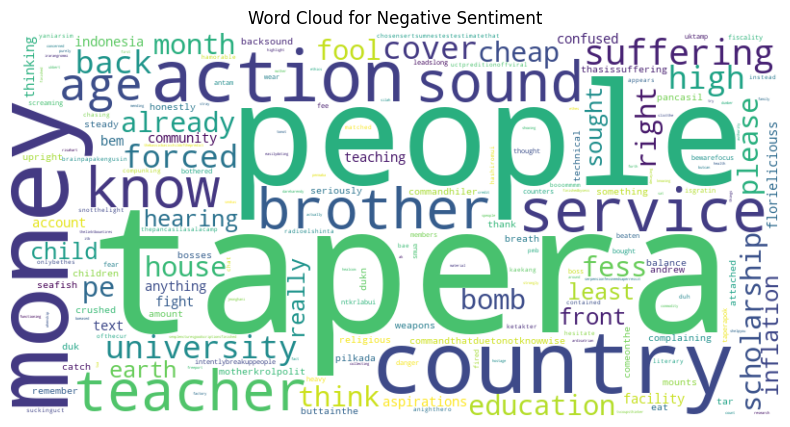

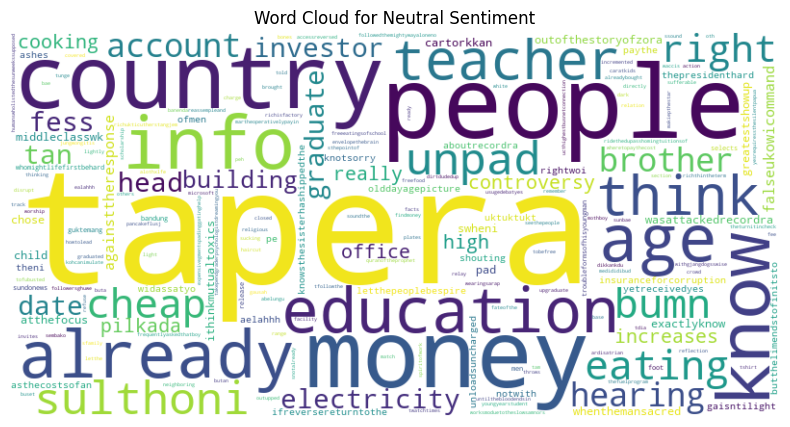

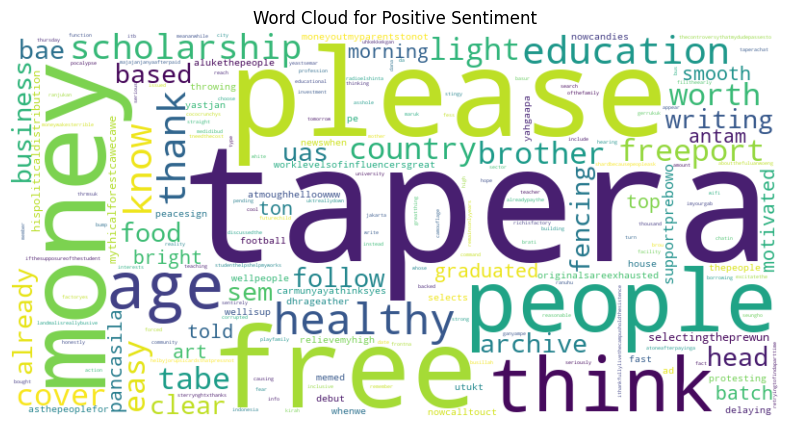

In [4]:
# Import necessary libraries
import langdetect
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from langdetect import detect

# Load the data with sentiment labels
final_data = pd.read_csv("stemmed_and_stopword_translated_data_with_sentiment_labels.csv")

# Fill NaN values with empty strings and convert all entries to strings
final_data['stemmed_and_stopword_translated_text'] = final_data['stemmed_and_stopword_translated_text'].fillna('').astype(str)

# Define stop words for Indonesian and English (populate these lists with actual stopwords)
stop_words_indo_nltk = ['dan', 'di', 'ke', 'dari', 'yang', 'untuk', 'dengan']  # Replace with real Indonesian stop words
stop_words_eng_nltk = ['and', 'the', 'to', 'of', 'in', 'with', 'for']  # Replace with real English stop words
additional_stopwords = ["segyeongstar", "aj", "jt", "ya", "ruu", "andrewstjan", "utt", "ken", "iti", "atw", "opioy"]  # Add any additional stop words here

# Combine stop words into a single set
all_stopwords = set(stop_words_indo_nltk + stop_words_eng_nltk + additional_stopwords)

# Function to detect and filter words that are not in English or Indonesian
def filter_non_english_indonesian(text):
    filtered_words = []
    for word in text.split():
        try:
            # Detect the language of each word
            lang = detect(word)
            # Keep the word if it is detected as English (en) or Indonesian (id)
            if lang in ['en', 'id']:
                filtered_words.append(word)
        except:
            # If language detection fails, skip the word
            continue
    return " ".join(filtered_words)

# Function to generate, display, and save a word cloud for a given text
def generate_and_save_word_cloud(text, title, filename):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=all_stopwords,
        max_words=200,
        contour_color='steelblue',
        contour_width=3
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    
    # Save the figure as a PNG image
    plt.savefig(filename, format='png')
    
    # Display the word cloud
    plt.show()

# Generate, display, and save word clouds for each sentiment category
for sentiment in ['negative', 'neutral', 'positive']:
    # Filter the text based on the sentiment label
    sentiment_text = final_data[final_data['sentiment_label'] == sentiment]['stemmed_and_stopword_translated_text']
    
    # Combine all the text entries into a single string
    combined_text = " ".join(sentiment_text)
    
    # Filter out non-English and non-Indonesian words
    filtered_text = filter_non_english_indonesian(combined_text)
    
    # Generate, display, and save the word cloud for this sentiment category
    generate_and_save_word_cloud(filtered_text, f'Word Cloud for {sentiment.capitalize()} Sentiment', f'word_cloud_{sentiment}.png')


Sentiment  Count
  neutral    243
 positive    217
 negative    189


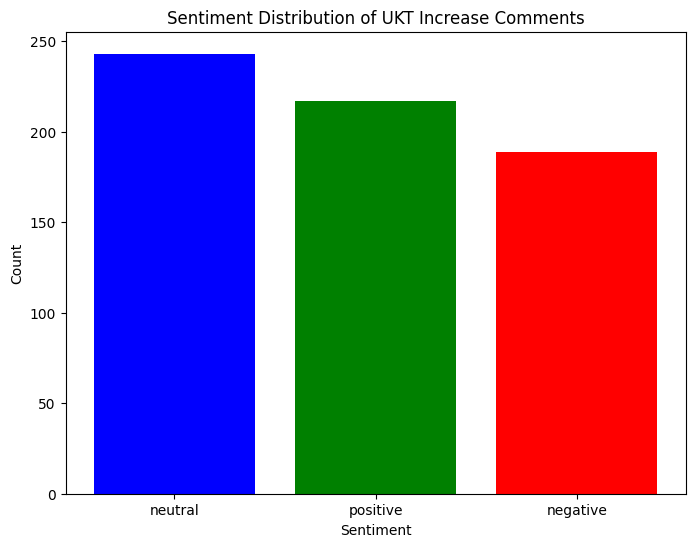

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the translated data with sentiment labels
data = pd.read_csv("sentiment_data_with_labels.csv")

# Count the sentiment labels
sentiment_counts = data["sentiment_label"].value_counts()

# Create a table to show sentiment counts
sentiment_table = pd.DataFrame({"Sentiment": sentiment_counts.index, "Count": sentiment_counts.values})
print(sentiment_table.to_string(index=False))

# Define colors for each sentiment
colors = {
    "positive": "green",
    "neutral": "blue",
    "negative": "red"
}

# Create a histogram to visualize sentiment distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors[sentiment] for sentiment in sentiment_counts.index])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution of UKT Increase Comments")

# Save the histogram as a PNG image
plt.savefig("sentiment_distribution_histogram.png", format='png')

# Display the histogram
plt.show()
